In [ ]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Thresholding

In [ ]:
!gdown "1FUIL-cSSy39qTMh-JUkFKNPf7ZZgvzkw"

Downloading...
From: https://drive.google.com/uc?id=1FUIL-cSSy39qTMh-JUkFKNPf7ZZgvzkw
To: /content/LAB 04 BLACK AND WHITE CATS.png
100% 1.45M/1.45M [00:00<00:00, 39.3MB/s]


### Binary Thresholding

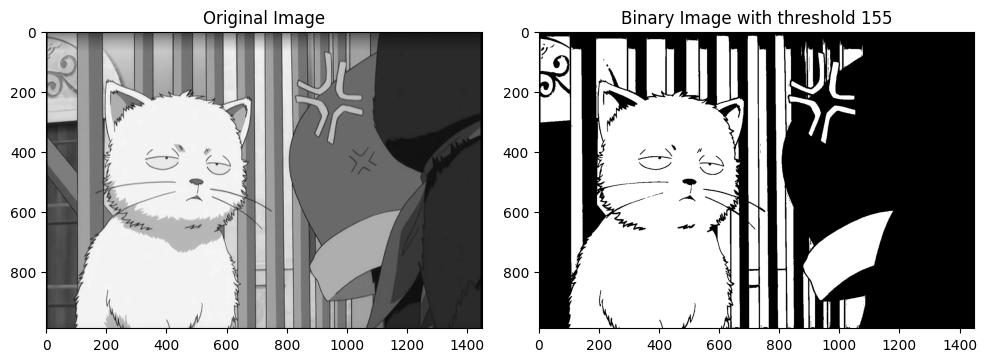

In [ ]:
image_path = '/content/LAB 04 BLACK AND WHITE CATS.png'
imageG = io.imread(image_path, as_gray=True)  # Load as grayscale
image = (imageG * 255).astype(np.uint8)   # Convert to integer range 0-255 from normalized [0, 1]

# Set the threshold value
threshold_value = 155

# Perform binarization
# np.where(condition, x, y): If condition is True, returns x; if False, returns y.
binary_image = np.where(image >= threshold_value, 255, 0).astype(np.uint8)


# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Binary Image with threshold 155')
plt.imshow(binary_image, cmap='gray')

plt.tight_layout()
plt.show()


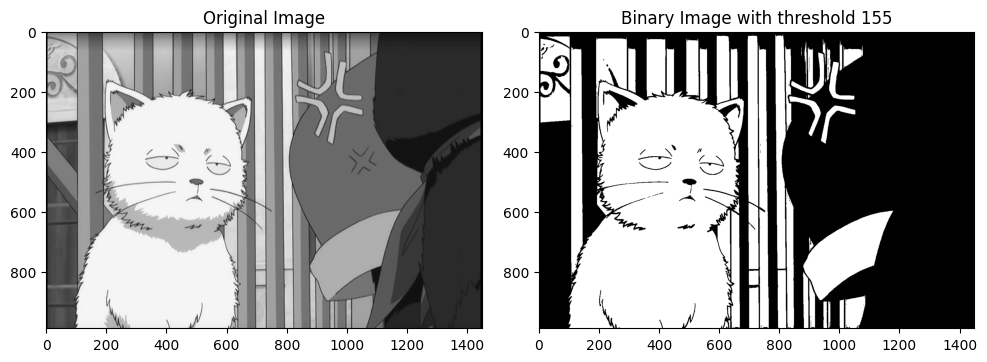

In [ ]:
# Image Binarization on Normalized [0, 1]

image_path = '/content/LAB 04 BLACK AND WHITE CATS.png'
imageG = io.imread(image_path, as_gray=True)  # Load as grayscale
# image = (imageG * 255).astype(np.uint8)   # Convert to integer range 0-255 from normalized [0, 1]

# Set the threshold value
# Set the threshold value (normalized)
threshold_value = 155 / 255.0  # Normalize to [0, 1]

# Perform binarization
binary_image = np.where(imageG >= threshold_value, 1, 0).astype(np.uint8)
# binary_image = np.where(image >= threshold_value, 255, 0).astype(np.uint8)

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(imageG, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Binary Image with threshold 155')
plt.imshow(binary_image, cmap='gray')

plt.tight_layout()
plt.show()


In [ ]:
print("imageG:", imageG)

print("\nimage:", image)



imageG: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

image: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print("imageG range:", imageG.min(), imageG.max())
print("image range:", image.min(), image.max())


imageG range: 0.0 1.0
image range: 0 255


### Histogram of Pixel Intensities

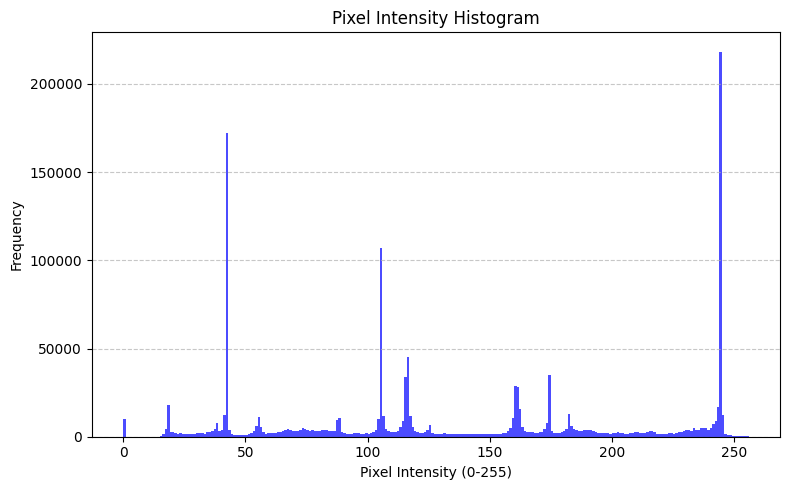

In [ ]:

plt.figure(figsize=(8, 5))
plt.hist(image.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7) # ravel flattens a multi-dimensional array  into a 1D array. This is necessary because histograms are computed based on a 1D array of values, where each value corresponds to a pixel intensity.
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for easier readability
plt.tight_layout()
plt.show()


The Y-axis (Frequency) represents the number of pixels for each intensity value, indicating how often each intensity occurs in the image:
- Higher values mean more pixels with that specific intensity. For example, a high frequency near intensity 255 indicates many white pixels in the image.

- White areas (e.g., the cat's body):
The fur of the cat primarily consists of high intensity values (close to 255), resulting in a peak near 255 in the histogram.

- Dark areas (e.g., the black region on the right):
The image's right side contains large dark regions (intensity close to 0), so the histogram shows a peak near 0.

- Intermediate intensity values (e.g., background bars, face shadows): Medium intensity values (e.g., 50 to 150) correspond to areas like the cat's outline and the bars in the background, resulting in some distribution in the middle range.


### Otsu’s Method

Otsu's threshold: 142


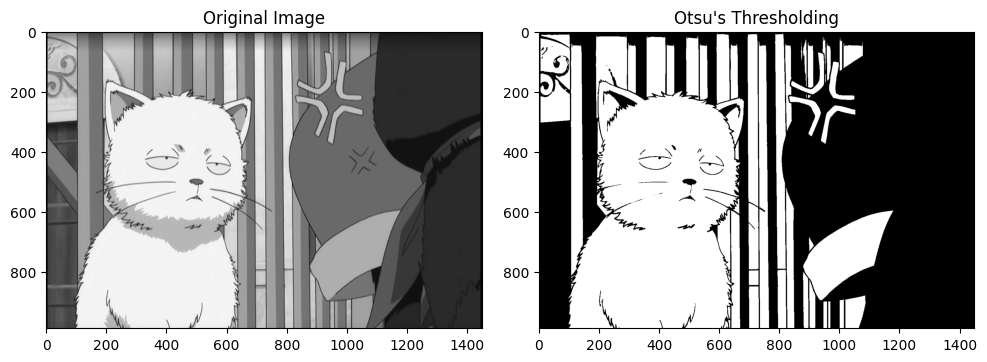

In [ ]:
from skimage.filters import threshold_otsu

# Calculate the threshold using Otsu's method
otsu_threshold = threshold_otsu(image)
print(f"Otsu's threshold: {otsu_threshold}")

# Apply thresholding
binary_image = image > otsu_threshold


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Otsu's Thresholding")
plt.imshow(binary_image, cmap='gray')

plt.tight_layout()
plt.show()

###  Multi-Otsu Thresholding

Thresholds: [ 90 181]


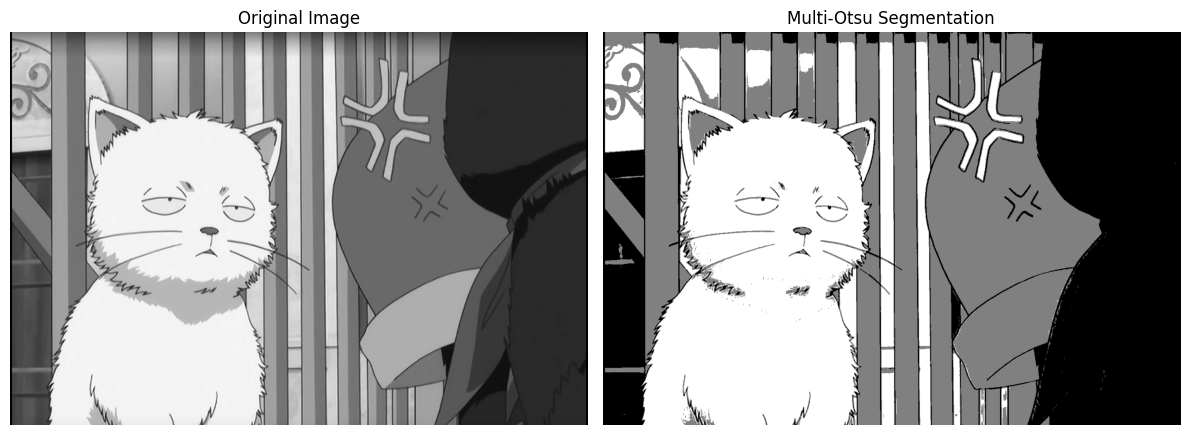

In [ ]:
from skimage.filters import threshold_multiotsu

# Calculate multiple thresholds using the Multi-Otsu method
thresholds = threshold_multiotsu(image, classes=3)
print(f"Thresholds: {thresholds}")

# Apply multi-threshold segmentation
# np.digitize() takes a pixel and divides it into bins
regions = np.digitize(image, bins=thresholds) # Categorize pixel values into classes based on the thresholds

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Multi-Otsu Segmentation")
plt.imshow(regions, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

- Category 1 (Dark regions): Grayscale values < 90.
- Category 2 (Medium brightness): 90 ≤ Grayscale values < 181.
- Category 3 (Bright regions): Grayscale values ≥ 181.

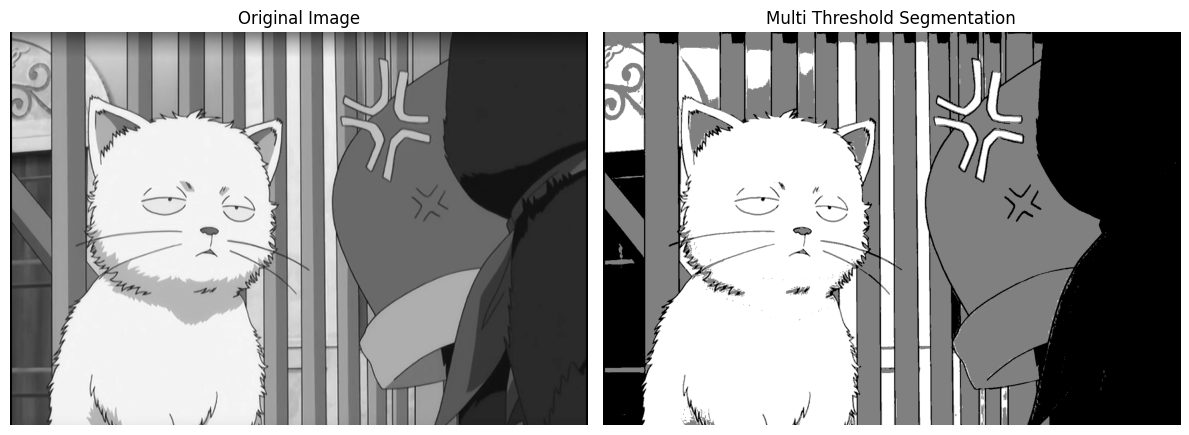

In [ ]:
from skimage.filters import threshold_multiotsu

# Calculate multiple thresholds
thresholds = [90, 180]
regions = np.digitize(image, bins=thresholds)  # Apply the predefined thresholds

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Multi Threshold Segmentation")
plt.imshow(regions, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Watershed

- The image is treated as a topographic map, where:
  - High intensity areas are viewed as mountains.
  - Low intensity areas are viewed as valleys.


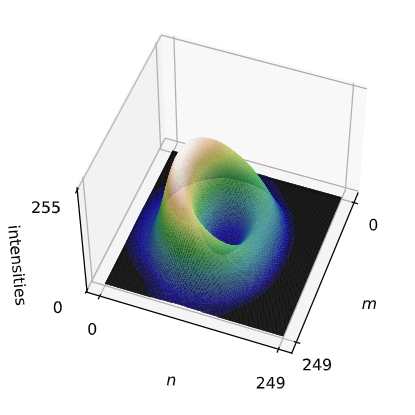

- This method aims to find the crest lines of the map.
These are the dividing lines between valleys.

- The image is gradually "flooded" with water from the valleys at a uniform rate
  - Water rises simultaneously across all valleys.
  - When water from two valleys comes close to merging, a dam is built to prevent merging.
  - These dams represent the boundaries of segmentation in the image.
  - After flooding the entire surface of the image the regions enclosed by the dams become separate segments.
  - The dams correspond to the boundaries of these segments, effectively dividing the image into distinct areas.

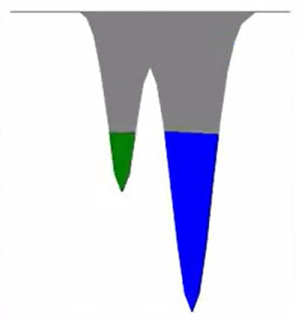

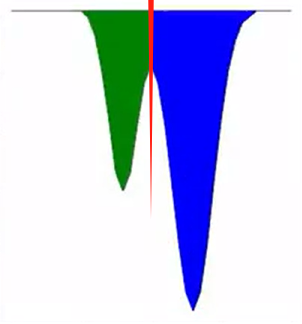

In [ ]:
!gdown "1v_k6fjmgpjRHll2PpQJjx5_7baHiO2PA"

Downloading...
From: https://drive.google.com/uc?id=1v_k6fjmgpjRHll2PpQJjx5_7baHiO2PA
To: /content/LAB 05 potato.jpg
100% 38.4k/38.4k [00:00<00:00, 13.3MB/s]


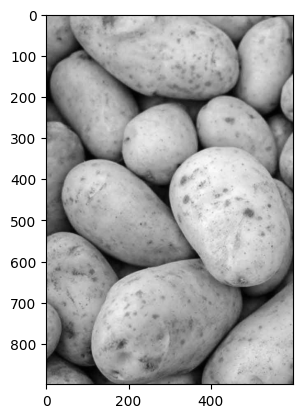

In [ ]:
plt.imshow(gray, cmap= "grey")

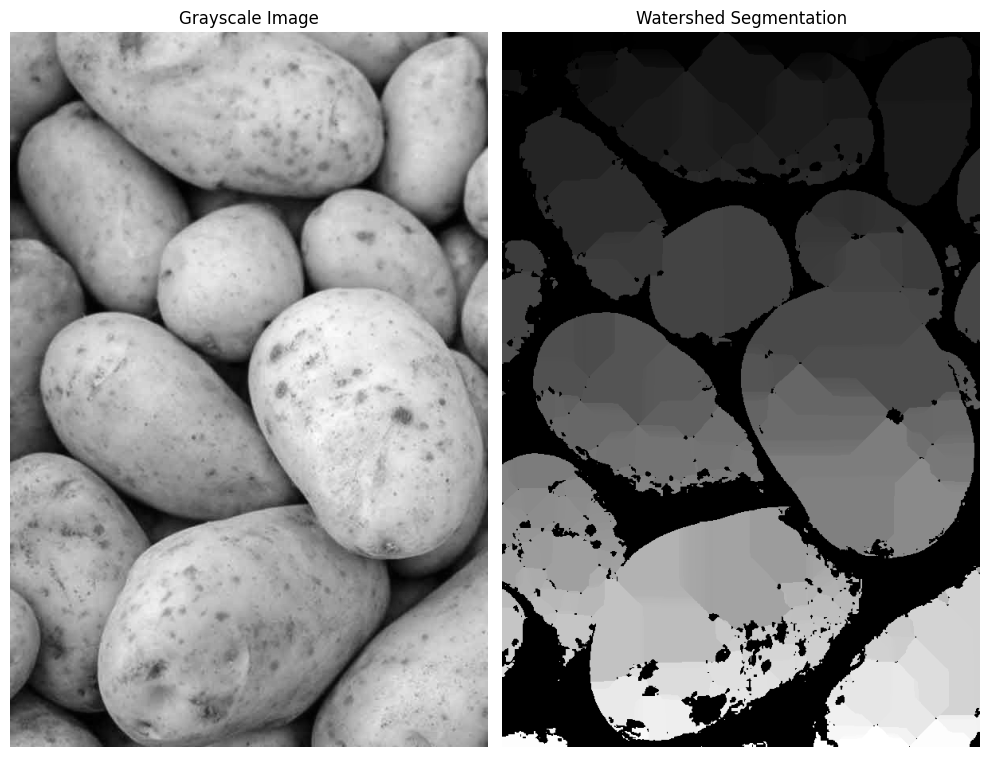

In [ ]:
from skimage import io, color, filters, morphology, measure
from scipy.ndimage import distance_transform_edt
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import watershed

# Step 1: Load the input image and convert it to grayscale
image_path = '/content/LAB 05 potato.jpg'
image = io.imread(image_path)
gray = color.rgb2gray(image)  # Convert to grayscale if it's a color image

# Step 2: Apply Otsu's thresholding to segment foreground and background
threshold_value = filters.threshold_otsu(gray)
binary = gray >= threshold_value  # Binary inversion (background=0, objects=1)

# Step 3: Compute distance transform on the binary image， between foreground and the nearest background pixel
# calculate the distance between potato and the background
distance = distance_transform_edt(binary)

# Step 4: Identify local maxima for watershed markers
# local maxima= A pixel that has a higher value than all its surrounding pixels, the center points of potato
local_maxi = morphology.local_maxima(distance)

# Convert the local maxima coordinates to a binary image for markers
markers = measure.label(local_maxi)
"""
Each local maximum is assigned a unique label, which serves as a seed point
Pixels with a value of 0 represent unmarked areas (background).
Non-zero values represent different markers.
"""

# Step 5: Apply the watershed algorithm with binary mask
# Negative of the distance transform is used because the algorithm floods from valleys to peaks.
# markers are the starting points
# mask=binary: Limits the flooding to the foreground area defined by the binary mask.
labels = watershed(-distance, markers, mask=binary)

# Step 6: Visualize the results
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(gray, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Watershed Segmentation")
plt.imshow(labels, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


# Evaluation

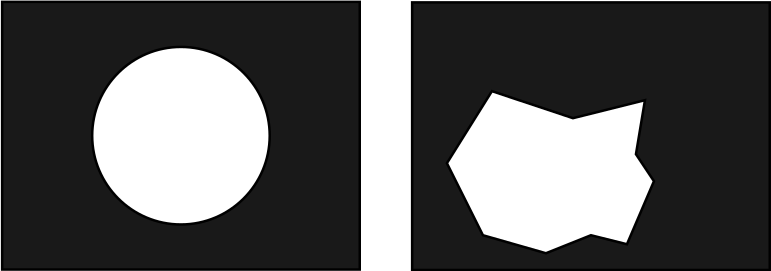

Left: Ground Truth, Right: Predicted segmentation

$$
\begin{array}{|c|c|c|}
\hline
 & \textbf{Predicted: Yes} & \textbf{Predicted: No} \\
\hline
\textbf{Actual: Yes} & \text{True Positive (TP)} & \text{False Negative (FN)} \\
\hline
\textbf{Actual: No} & \text{False Positive (FP)} & \text{True Negative (TN)} \\
\hline
\end{array}
$$

- TP: True Positive
- TF: True Negative
- FP: False Positive
- FN: False Negative

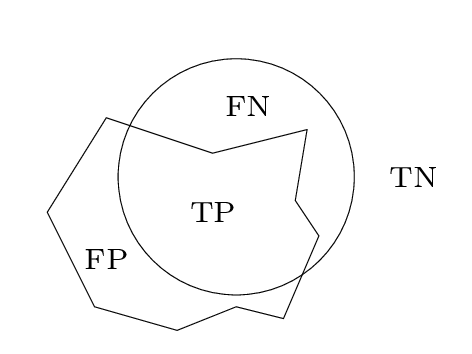

# Dice Coefficient
- The Dice Coefficient measures the similarity between the predicted and ground truth regions.
- A higher Dice value means that the prediction is closer to the ground truth.

$$
\text{Dice} = \frac{2 \times \text{TP}}{2 \times \text{TP} + \text{FP} + \text{FN}}
$$



In image segmentation:

- **Intersection** corresponds to True Positive (TP).
- **Predicted** corresponds to the total area of the predicted region (TP + FP).
- **Ground Truth** corresponds to the total area of the ground truth region (TP + FN).

$$
\text{Dice} = \frac{2 \times |\text{Intersection}|}{|\text{Predicted}| + |\text{Ground Truth}|}
$$


### Binary Threshold and Dice Evaluation

In [ ]:
!gdown "1sWYKuwLg_1nFylJ1h9Xpjr5zy-1-BwcN"

Downloading...
From: https://drive.google.com/uc?id=1sWYKuwLg_1nFylJ1h9Xpjr5zy-1-BwcN
To: /content/LAB05 IMG1.png
100% 61.6k/61.6k [00:00<00:00, 59.3MB/s]


In [ ]:
!gdown "15jipoft8qFVghFrLVlWTDJmvtZTKuVeB"

Downloading...
From: https://drive.google.com/uc?id=15jipoft8qFVghFrLVlWTDJmvtZTKuVeB
To: /content/LAB05 IMG2.png
100% 15.4k/15.4k [00:00<00:00, 38.2MB/s]


Dice Coefficient: 0.6739


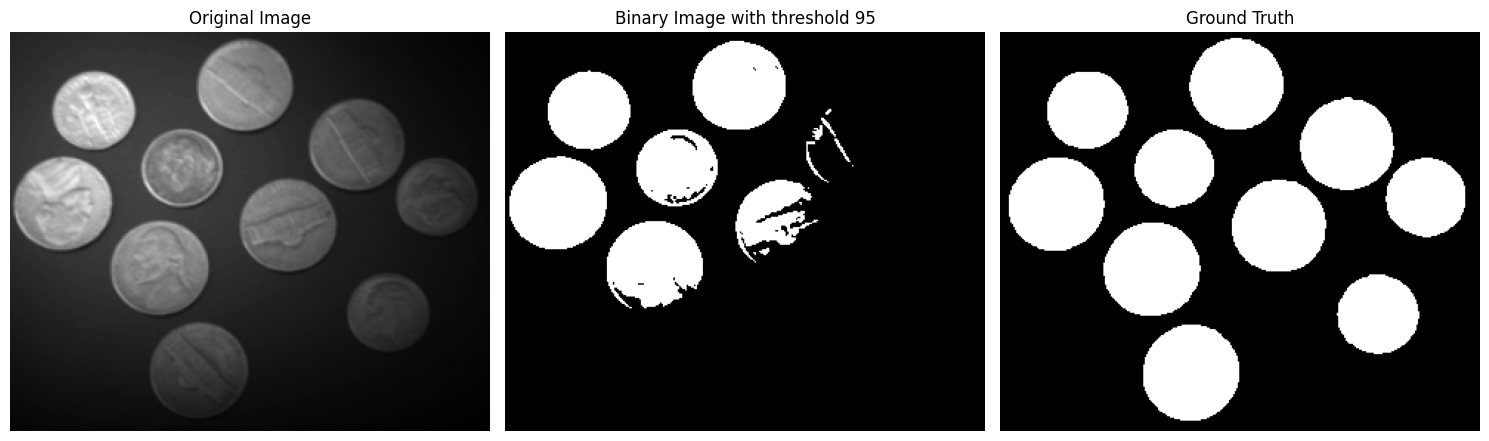

In [ ]:
# Step 1: Load the input image
image_path = '/content/LAB05 IMG1.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)  # Load directly as grayscale

# Step 2: Set a threshold value and perform binary thresholding
threshold_value = 95
_, binary_image = cv.threshold(image, threshold_value, 1, cv.THRESH_BINARY)  # Binary segmentation (0 or 1)

# Step 3: Load and preprocess the ground truth
ground_truth_path = '/content/LAB05 IMG2.png'
ground_truth = cv.imread(ground_truth_path, cv.IMREAD_GRAYSCALE)  # Load as grayscale

# Resize Ground Truth to match the input image size dynamically
ground_truth_resized = cv.resize(ground_truth, (image.shape[1], image.shape[0]))  # Match size of `image`
ground_truth_binary = (ground_truth_resized > 128).astype(np.uint8)  # Ensure binary (0 or 1)

# Step 4: Calculate Dice coefficient
intersection = np.sum(binary_image * ground_truth_binary)  # TP
# binary_image= predicted(segmented output)
# ground_truth_binary= ground truth
"""
binary_image:        [0, 1, 1, 0]
ground_truth_binary: [1, 1, 0, 0]
Result of *:         [0, 1, 0, 0]

"""
dice_coefficient = (2. * intersection) / (np.sum(binary_image) + np.sum(ground_truth_binary))
print(f"Dice Coefficient: {dice_coefficient:.4f}")

# Step 5: Visualize the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Binary Image with threshold 95")
plt.imshow(binary_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Ground Truth")
plt.imshow(ground_truth_binary, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


# Optimizing Threshold for Maximum Dice Coefficient

### Using OpenCV

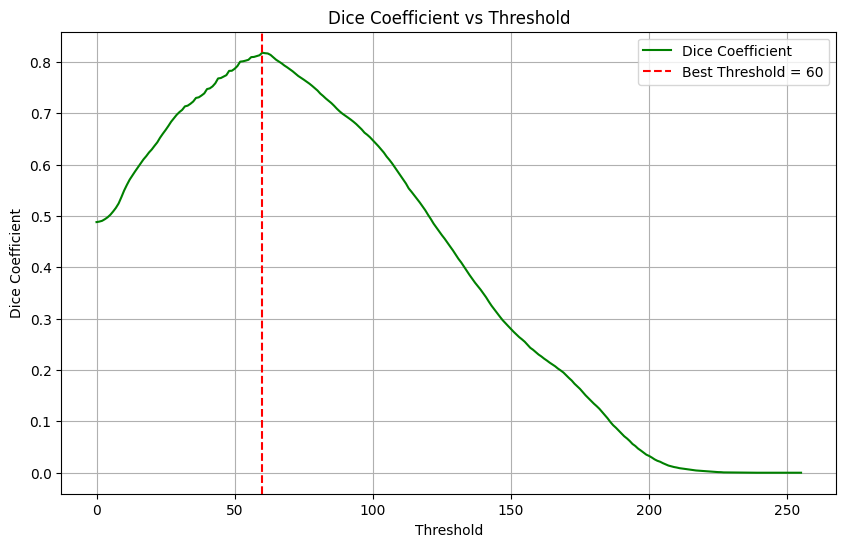

Best Threshold: 60
Maximum Dice Coefficient: 0.8180


In [ ]:
# Step 1: Load the input image and ground truth using OpenCV
image_path = '/content/LAB05 IMG1.png'
ground_truth_path = '/content/LAB05 IMG2.png'

# Load input image as grayscale
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Load ground truth and resize it to match input image size
ground_truth = cv.imread(ground_truth_path, cv.IMREAD_GRAYSCALE)
ground_truth_resized = cv.resize(ground_truth, (image.shape[1], image.shape[0]))  # Match input size
ground_truth_binary = (ground_truth_resized > 128).astype(np.uint8)  # Ensure binary (0 or 1)

# Step 2: Initialize variables to store best threshold and maximum Dice coefficient
best_threshold = 0 2
max_dice = 0 2
dice_values = []  # Store Dice coefficient for each threshold

# Step 3: Iterate through all threshold values (0-255)
for threshold in range(256):
    # Perform binary thresholding using OpenCV
    _, binary_image = cv.threshold(image, threshold, 1, cv.THRESH_BINARY)  # Binary segmentation (0 or 1)

    # Calculate Dice coefficient
    intersection = np.sum(binary_image * ground_truth_binary)
    dice_coefficient = (2. * intersection) / (np.sum(binary_image) + np.sum(ground_truth_binary) + 1e-6)
    dice_values.append(dice_coefficient)  # Store Dice coefficient

    # Update best threshold if current Dice coefficient is greater
    if dice_coefficient > max_dice:
        max_dice = dice_coefficient
        best_threshold = threshold

# Step 4: Visualize the results
plt.figure(figsize=(10, 6))

# Plot Dice coefficient as a function of threshold
plt.plot(range(256), dice_values, label="Dice Coefficient", color="green")
plt.axvline(best_threshold, color="red", linestyle="--", label=f"Best Threshold = {best_threshold}")
plt.title("Dice Coefficient vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Dice Coefficient")
plt.legend()
plt.grid()
plt.show()

# Step 5: Print the best threshold and its corresponding Dice coefficient
print(f"Best Threshold: {best_threshold}")
print(f"Maximum Dice Coefficient: {max_dice:.4f}")


Dice Coefficient: 0.8180


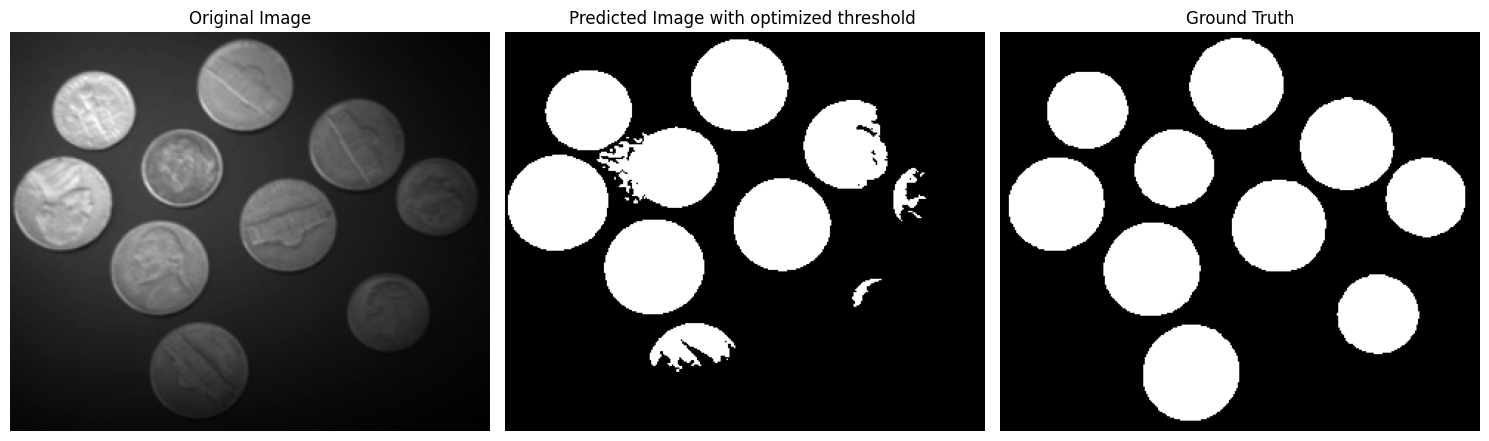

In [ ]:
# Step 1: Load the input image and preprocess it
image_path = '/content/LAB05 IMG1.png'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)  # Load directly as grayscale

# Step 2: Set a threshold value and perform binary thresholding
threshold_value = 60
_, binary_image = cv.threshold(image, threshold_value, 1, cv.THRESH_BINARY)  # Binary segmentation (0 or 1)

# Step 3: Load and preprocess the ground truth
ground_truth_path = '/content/LAB05 IMG2.png'
ground_truth = cv.imread(ground_truth_path, cv.IMREAD_GRAYSCALE)  # Load as grayscale

# Resize Ground Truth to match the input image size dynamically
ground_truth_resized = cv.resize(ground_truth, (image.shape[1], image.shape[0]))  # Match size of `image`
ground_truth_binary = (ground_truth_resized > 128).astype(np.uint8)  # Ensure binary (0 or 1)

# Step 4: Calculate Dice coefficient
intersection = np.sum(binary_image * ground_truth_binary)  # Intersection of binary and ground truth
dice_coefficient = (2. * intersection) / (np.sum(binary_image) + np.sum(ground_truth_binary))
print(f"Dice Coefficient: {dice_coefficient:.4f}")

# Step 5: Visualize the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Predicted Image with optimized threshold ")
plt.imshow(binary_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Ground Truth")
plt.imshow(ground_truth_binary, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


### Using skimage

Dice Coefficient: 0.8131


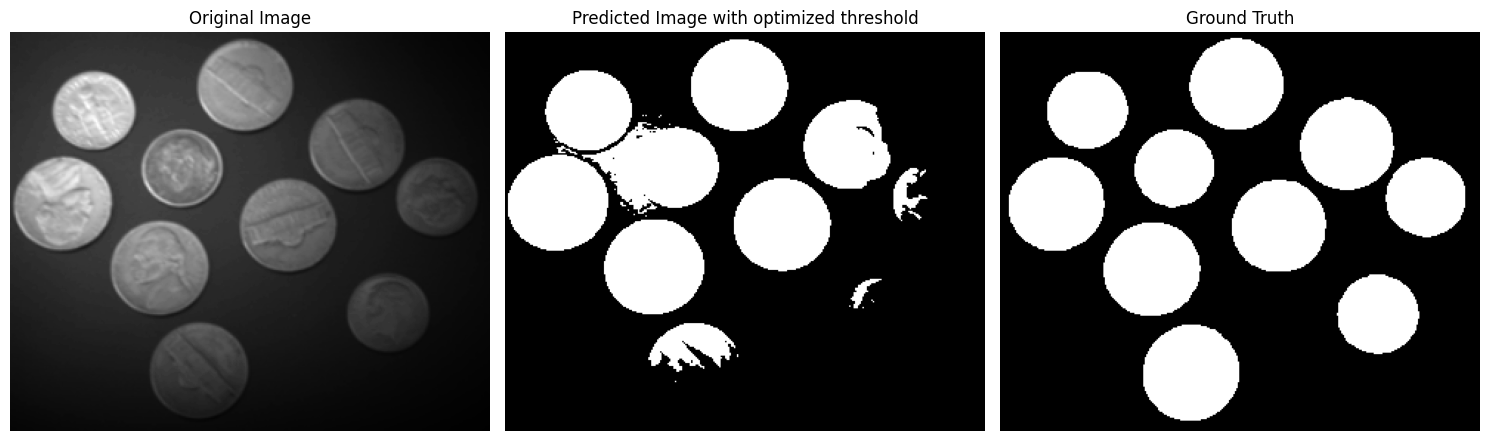

In [ ]:
from skimage import io, transform

# Step 1: Load the input image and preprocess it
image_path = '/content/LAB05 IMG1.png'
image = io.imread(image_path, as_gray=True)  # Load as grayscale (normalized to [0, 1])
image = (image * 255).astype(np.uint8)  # Convert to 8-bit grayscale (0-255)

# Step 2: Set a threshold value and perform binary thresholding
threshold_value = 60
binary_image = (image >= threshold_value).astype(np.uint8)  # Binary segmentation (0 or 1)

# Step 3: Load and preprocess the ground truth
ground_truth_path = '/content/LAB05 IMG2.png'
ground_truth = io.imread(ground_truth_path, as_gray=True)  # Load as grayscale
ground_truth = transform.resize(ground_truth, image.shape, mode='reflect', anti_aliasing=False) # reflect： image edges reflects as mirror to avoid artifacts at the edges. anti_aliasing: avoid blur, maintain sharpness
ground_truth_binary = (ground_truth > 0.5).astype(np.uint8)  # Convert to binary (threshold = 0.5 for normalized images)

# Step 4: Calculate Dice coefficient
intersection = np.sum(binary_image * ground_truth_binary)  # Intersection of binary and ground truth
dice_coefficient = (2. * intersection) / (np.sum(binary_image) + np.sum(ground_truth_binary) + 1e-6)  # Avoid division by zero
print(f"Dice Coefficient: {dice_coefficient:.4f}")

# Step 5: Visualize the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Predicted Image with optimized threshold")
plt.imshow(binary_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Ground Truth")
plt.imshow(ground_truth_binary, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


# Clusturing

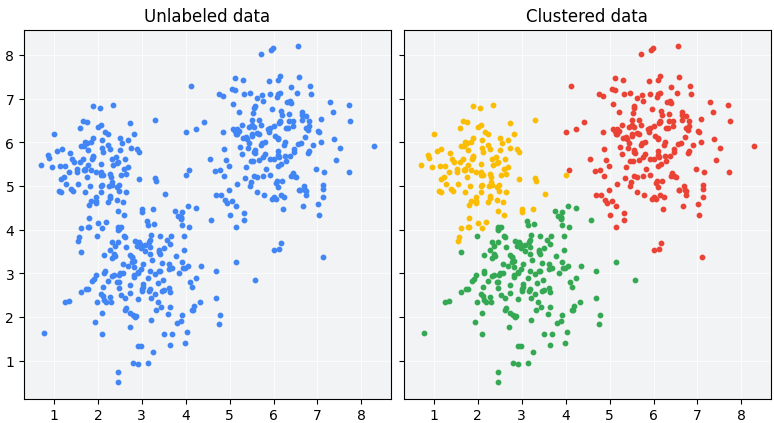

# K-Means Clustering Example

## 1. Problem Description and centroids initialization
We have 8 points:

$$
A_1(2,10),\ A_2(2,5),\ A_3(8,4),\ A_4(5,8),\ A_5(7,5),\ A_6(6,4),\ A_7(1,2),\ A_8(4,9)
$$

We aim to cluster these points into \(k=3\) clusters. The initial cluster centers are:

$$
C_1: A_1(2,10),\ C_2: A_4(5,8),\ C_3: A_7(1,2)
$$


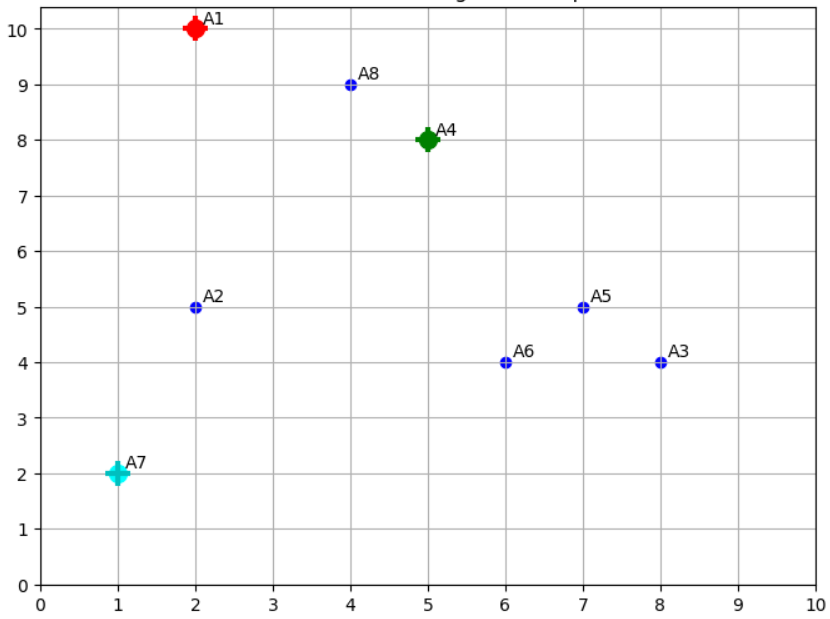

## 2. Distance Calculation (Calculate for A2)


$$
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$


Distance to C1


$$
d_{A_2, C_1} = \sqrt{(2 - 2)^2 + (5 - 10)^2}
$$

$$
= 5
$$

Distance to C2

$$
d_{A_2, C_2} = \sqrt{(2 - 5)^2 + (5 - 8)^2}
$$
$$
 \approx 4.24
$$

Distance to C3


$$
d_{A_2, C_3} = \sqrt{(2 - 1)^2 + (5 - 2)^2}
$$

$$
\approx 3.16
$$


The nearest cluster for $A_2$ is $C_3$。


## 3. Calculate New Centroid

$$
C_2 = \left( \frac{x_1 + x_2 + x_3 + x_4 + x_5}{5}, \frac{y_1 + y_2 + y_3 + y_4 + y_5}{5} \right)
$$


$$
C_2 = (6, 6)
$$

## 4. Repeat Step 2 and 3
until there has no changes

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

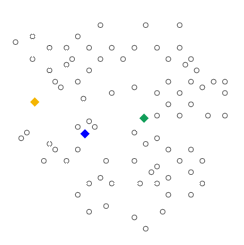

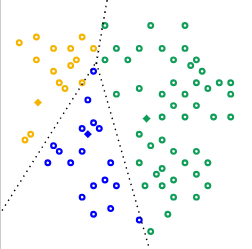

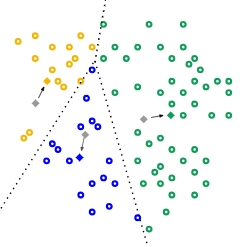

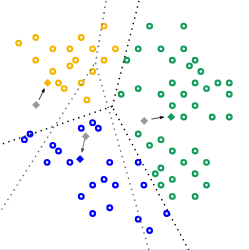

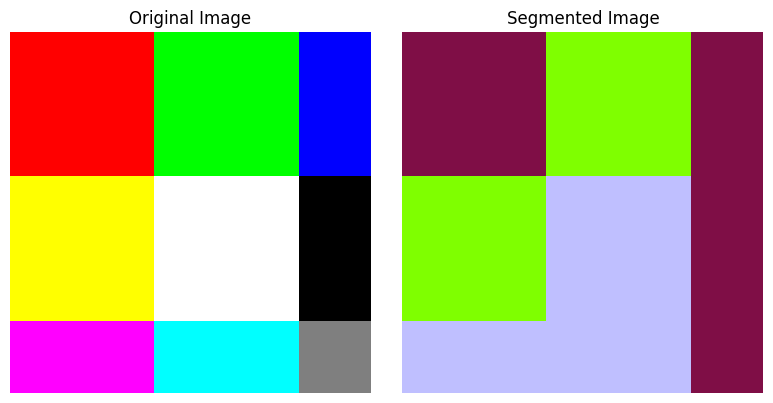

In [ ]:
from sklearn.cluster import KMeans

# Step 1: Simulated "image" data (5x5 grid of pixels with RGB values)
image_data = np.array([
    [[255, 0, 0], [255, 0, 0], [0, 255, 0], [0, 255, 0], [0, 0, 255]],
    [[255, 0, 0], [255, 0, 0], [0, 255, 0], [0, 255, 0], [0, 0, 255]],
    [[255, 255, 0], [255, 255, 0], [255, 255, 255], [255, 255, 255], [0, 0, 0]],
    [[255, 255, 0], [255, 255, 0], [255, 255, 255], [255, 255, 255], [0, 0, 0]],
    [[255, 0, 255], [255, 0, 255], [0, 255, 255], [0, 255, 255], [127, 127, 127]]
], dtype=np.uint8)

# Step 2: Reshape the image data into a 2D array of pixels (n_samples, n_features)
pixels = image_data.reshape(-1, 3)  # Flatten the 3D image to 2D pixels (rows: pixels, cols: RGB values)

# Step 3: Apply K-Means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)

# Step 4: Replace pixel values with their respective cluster centers
segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]
# # Reconstruct the Image: Reshapes the flattened array of pixels back into the original image shape (height, width, and channels).
segmented_image = segmented_pixels.reshape(image_data.shape).astype('uint8')


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_data)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Segmented Image")
plt.imshow(segmented_image)
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
print("Original Image Shape:", image_data.shape)


Original Image Shape: (5, 5, 3)


In [ ]:
print("Pixels Shape:", pixels.shape)

Pixels Shape: (25, 3)


In [ ]:
kmeans.labels_

array([1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int32)

In [ ]:
print("Labels for Each Pixel (kmeans.labels_):")
print(kmeans.labels_)
print("\nCluster Centers (kmeans.cluster_centers_):")
print(kmeans.cluster_centers_)


Labels for Each Pixel (kmeans.labels_):
[1 1 2 2 1 1 1 2 2 1 2 2 0 0 1 2 2 0 0 1 0 0 0 0 1]

Cluster Centers (kmeans.cluster_centers_):
[[ 1.91250000e+02  1.91250000e+02  2.55000000e+02]
 [ 1.27444444e+02  1.41111111e+01  7.07777778e+01]
 [ 1.27500000e+02  2.55000000e+02 -1.42108547e-14]]


In [ ]:
segmented_pixels

array([[ 1.27444444e+02,  1.41111111e+01,  7.07777778e+01],
       [ 1.27444444e+02,  1.41111111e+01,  7.07777778e+01],
       [ 1.27500000e+02,  2.55000000e+02, -1.42108547e-14],
       [ 1.27500000e+02,  2.55000000e+02, -1.42108547e-14],
       [ 1.27444444e+02,  1.41111111e+01,  7.07777778e+01],
       [ 1.27444444e+02,  1.41111111e+01,  7.07777778e+01],
       [ 1.27444444e+02,  1.41111111e+01,  7.07777778e+01],
       [ 1.27500000e+02,  2.55000000e+02, -1.42108547e-14],
       [ 1.27500000e+02,  2.55000000e+02, -1.42108547e-14],
       [ 1.27444444e+02,  1.41111111e+01,  7.07777778e+01],
       [ 1.27500000e+02,  2.55000000e+02, -1.42108547e-14],
       [ 1.27500000e+02,  2.55000000e+02, -1.42108547e-14],
       [ 1.91250000e+02,  1.91250000e+02,  2.55000000e+02],
       [ 1.91250000e+02,  1.91250000e+02,  2.55000000e+02],
       [ 1.27444444e+02,  1.41111111e+01,  7.07777778e+01],
       [ 1.27500000e+02,  2.55000000e+02, -1.42108547e-14],
       [ 1.27500000e+02,  2.55000000e+02

In [ ]:
!gdown "1CJ_DeImzr92eqd3zYeLi6NouTH8Kcctx"

Downloading...
From: https://drive.google.com/uc?id=1CJ_DeImzr92eqd3zYeLi6NouTH8Kcctx
To: /content/LAB 05 two cats.jpg
100% 51.0k/51.0k [00:00<00:00, 73.0MB/s]


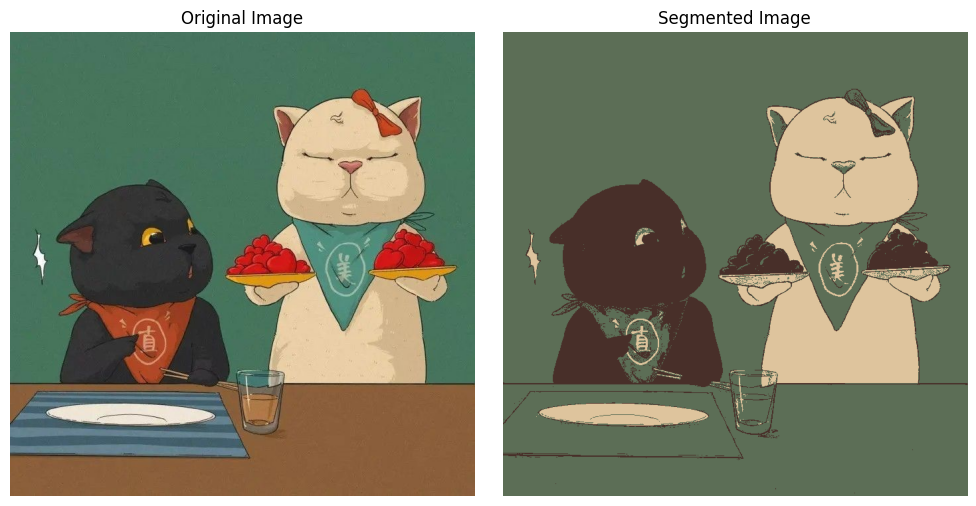

In [ ]:
# Step 1: Read and preprocess the image
two_cats = cv.imread('/content/LAB 05 two cats.jpg')
two_cats = cv.cvtColor(two_cats, cv.COLOR_BGR2RGB)  # Convert BGR to RGB
two_catspixels = two_cats.reshape(-1, 3)  # Flatten the image into a 2D array of pixels

# Step 2: Apply K-Means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(two_catspixels)

# Step 3: Map cluster centers to pixels
segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]  # Replace each pixel with its cluster center
segmented_image = segmented_pixels.reshape(two_cats.shape).astype('uint8')  # Reshape back to original image dimensions

# Step 4: Visualize the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(two_cats)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
two_cats.shape

(700, 700, 3)

In [ ]:
two_catspixels.shape

(490000, 3)

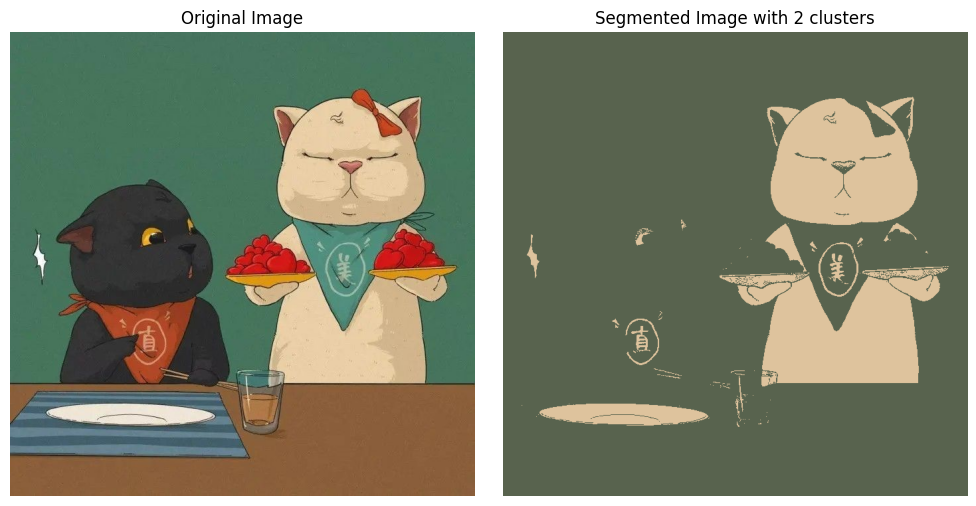

In [ ]:
# Step 1: Read and preprocess the image
two_cats = cv.imread('/content/LAB 05 two cats.jpg')
two_cats = cv.cvtColor(two_cats, cv.COLOR_BGR2RGB)  # Convert BGR to RGB
two_catspixels = two_cats.reshape(-1, 3)  # Flatten the image into a 2D array of pixels

# Step 2: Apply K-Means clustering
k = 2  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(two_catspixels)

# Step 3: Map cluster centers to pixels
segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]  # Replace each pixel with its cluster center
segmented_image = segmented_pixels.reshape(two_cats.shape).astype('uint8')  # Reshape back to original image dimensions

# Step 4: Visualize the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(two_cats)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title('Segmented Image with 2 clusters')
plt.imshow(segmented_image)
plt.axis("off")

plt.tight_layout()
plt.show()


### Elbow Method

<ipython-input-32-c553065834de>:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(k_values, inertia, 'o-', label='Inertia', marker='o')


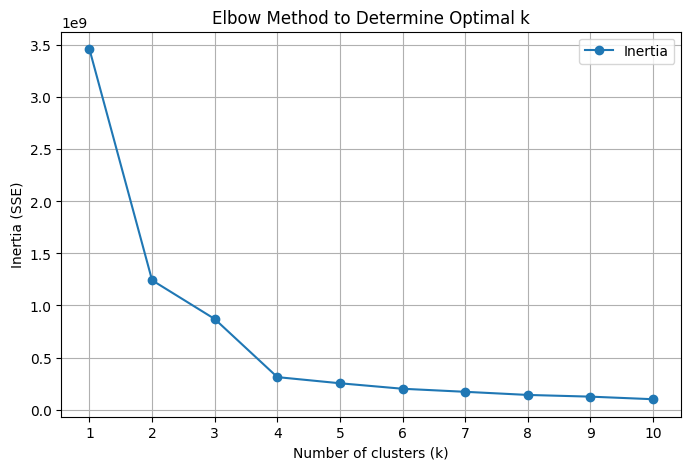

In [ ]:
# Initialize a list to store inertia values
inertia = [] # compactness
k_values = range(1, 11)  # Range of cluster numbers from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(two_catspixels) # Fit the KMeans model on the pixel
    inertia.append(kmeans.inertia_)  # save Inertia

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'o-', label='Inertia', marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


The curve starts to flatten around k=4。

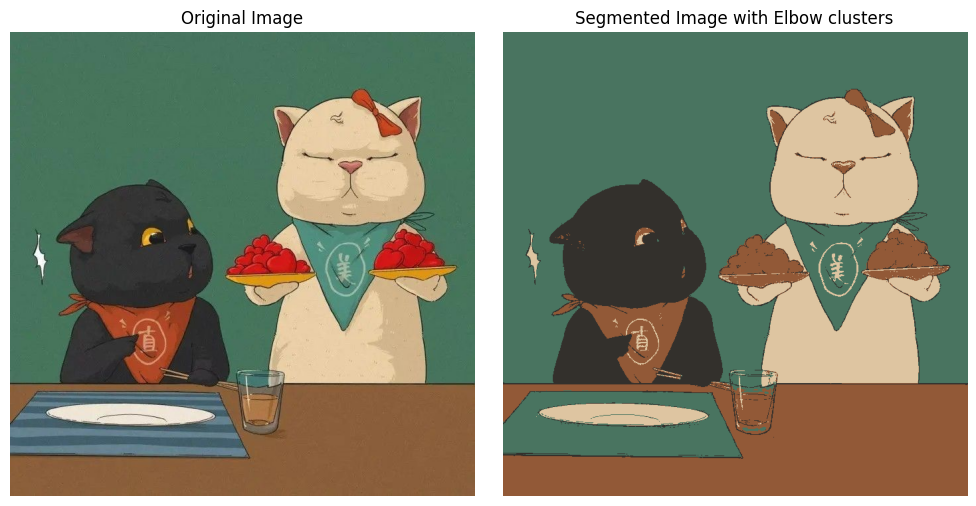

In [ ]:
# Step 1: Read and preprocess the image
two_cats = cv.imread('/content/LAB 05 two cats.jpg')
two_cats = cv.cvtColor(two_cats, cv.COLOR_BGR2RGB)  # Convert BGR to RGB
two_catspixels = two_cats.reshape(-1, 3)  # Flatten the image into a 2D array of pixels

# Step 2: Apply K-Means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(two_catspixels)

# Step 3: Map cluster centers to pixels
segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]  # Replace each pixel with its cluster center
segmented_image = segmented_pixels.reshape(two_cats.shape).astype('uint8')  # Reshape back to original image dimensions

# Step 4: Visualize the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(two_cats)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title('Segmented Image with Elbow clusters')
plt.imshow(segmented_image)
plt.axis("off")

plt.tight_layout()
plt.show()
